# Function derivative interactive notebook
This notebook has been designed to demonstrate how the derivative of a function can be ploted in order to show how the slope behave in relation to the increasing or decreasing values of a function.
This information is especially useful when one is learning how neural networks works.

## Importing libraries

In [1]:
import os # Enables Operational System integration
import math # Some math stuff
import numpy as np # Enables more advanced math tricks and simplify array manipulations
from ipywidgets import interact # Enables interaction
import matplotlib.pyplot as plt # Enables the ploting

## Enables interactivity

In [2]:
# Enables interactivity
%matplotlib inline

## Activation functions
The code below defines the activation functions and its respectively derivatives. In the context of the neural networks this functions are called activation functions.
For more functions like that visit: https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions

- Creates a list of activation functions and its derivatives

In [3]:
activations = []

In [4]:
"""
Some activations function and its respectives derivatives.
Source: https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions
"""

############# Sigmoid ############
def sigmoid(x):
    return 1.0/(1.0 + math.e**(-x))

def sigmoidD(x): 
    y = sigmoid(x)
    return y * (1.0 - y)

activations.append(('sigmoid',[sigmoid, sigmoidD]))


############# Step ############
def step(x):
    return np.heaviside(x, 0)

def stepD(x):
    # This subfunction is used to
    # modify regular numbers or
    # numpy arrays
    def f(a):
        if a != 0:
            return 0.0
        else:
            return np.NAN
    
    # Checks if we are using an array
    # or an regular number
    if type(x) == np.ndarray:
        # array
        return np.array(list(map(f, x)))
    else:
        # regular number 
        return f(x)

    
activations.append(('step',[step, stepD]))


############# Relu ############
def relu(x):
    # Checks if we are using an array
    # or an regular number
    if type(x) == np.ndarray:
        # array
        return np.fmax(x,0)
    else:
        # regular number 
        return max(x,0)


def reluD(x):
    # Checks if we are using an array
    # or an regular number
    if type(x) == np.ndarray:
        # array
        return np.heaviside(x, 1)
    else:
        # regular number 
        return 0 if x < 0 else 1

    
activations.append(('relu',[relu, reluD]))


############# Hiperbolic tangent ############
def hiperbolicTangent(x):
    y1 = math.e**(x)
    y2 = math.e**(-x)
    return (y1 - y2) / (y1 + y2)

def hiperbolicTangentD(x):
    return 1 - hiperbolicTangent(x)**2

activations.append(('hiperbolic tangent',[hiperbolicTangent, hiperbolicTangentD]))


############# Softplus ############
def softplus(x):
    return np.log(1 + math.e**x)

def softplusD(x):
    return 1.0/(1.0 + math.e**(-x))

activations.append(('softplus',[softplus, softplusD]))


############# Leaky relu ############
def leakyRelu(x):
    # This subfunction is used to
    # modify regular numbers or
    # numpy arrays
    def f(a):
        if a < 0:
            return 0.01 * a
        else:
            return a
    
    # Checks if we are using an array
    # or an regular number
    if type(x) == np.ndarray:
        # array
        return np.array(list(map(f, x)))
    else:
        # regular number 
        return f(x)

    
def leakyReluD(x):
    # This subfunction is used to
    # modify regular numbers or
    # numpy arrays
    def f(a):
        if a < 0:
            return 0.01
        else:
            return 1
    
    # Checks if we are using an array
    # or an regular number
    if type(x) == np.ndarray:
        # array
        return np.array(list(map(f, x)))
    else:
        # regular number 
        return f(x)
    
activations.append(('leaky relu',[leakyRelu, leakyReluD]))


############# Silu ############
def silu(x):
    return x/(1.0 + math.e**(-x))

def siluD(x):
    return (
        (1 + math.e**(-x))
        +
        (x * math.e**(-x))
    )/(
        (1 + math.e**(-x))**2
      )

activations.append(('silu',[silu, siluD]))

############# Not an activation function ############
def nactf(x):
    return 1+(x-1)**2

def nactfD(x):
    return 2*x-2

activations.append(('Not an activation function',[nactf, nactfD]))

## Plotting parameters and function

- Makes the plot bigger

In [5]:
plt.rcParams["figure.figsize"] = (5,5)

- Plotting function

In [6]:
# Used to redraw the plot
def plotNeuron(x = 0.0, lowerBound = -10, upperBound = 10, resolution=100, func = activations[0]):
    f = func[0]
    slopef = func[1]
    
    # evaluation of the function
    y = f(x) # Evaluate function on point x
    
    xrange = np.linspace(lowerBound, upperBound, resolution) # Define the range of the plot
    yrange = f(xrange) # Evaluate the function on all plot points

    # This is an interesting approach on how to derive a function
    # pretty clever! That is why this is still here
    # h = 0.000000000001
    # slope = (f(x+h)-f(x))/h # the tangent curve's angular coefficient

    slope = slopef(x) # the tangent curve's angular coefficient
    tangentY = y+slope*(xrange-x)  # tangent curve Ys

    # Define the boundaries of the plot
    plt.ylim([f(lowerBound) - 0.2, f(upperBound) + 0.2])
    plt.xlim([lowerBound, upperBound])
    
    # Plot the curve
    plt.plot(xrange, yrange)
    
    # Plot the tangent line
    plt.plot(xrange, tangentY, 'C1--', linewidth = 2)
    
    # Plot the vertical line, dot and label
    plt.axvline(x, color = 'c')
    plt.scatter(x, y, color='C1', s=50)
    plt.annotate('x:{:04.2f}, y:{:04.2f} -> slope:{:04.2f}'.format(x, y, slope), (lowerBound, f(upperBound) + 0.2))
    plt.grid()
    
    plt.show()

## Finally, this one enables the interaction

In [7]:
interact(plotNeuron, x=(-10.0, 10.0, 0.00001),func=activations)

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, min=-10.0, step=1e-05), IntSlider(valu…

<function __main__.plotNeuron(x=0.0, lowerBound=-10, upperBound=10, resolution=100, func=('sigmoid', [<function sigmoid at 0x7187a4b8af20>, <function sigmoidD at 0x7187a4b9a5c0>]))>

In [8]:
def test(x,y):
    return x**2 + y**2

def testDx(x, y):
    return 2*x

def testDy(x, y):
    return 2*y

from mpl_toolkits import mplot3d

def uga(angle1=60, angle2=35):
    ax = plt.axes(projection='3d')

    # Data for a three-dimensional line
    x = np.linspace(-10, 10, 10)
    y = np.linspace(-10, 10, 10)

    X, Y = np.meshgrid(x, y)
    Z = test(X, Y)

    fig = plt.figure()
    ax.plot_wireframe(X, Y, Z, color='blue')
    ax.plot_surface(X, Y, Z, rstride=20, cstride=20, cmap='viridis', edgecolor='none')
    
    # Set the perspective projections
    ax.set_proj_type('persp')  # FOV = 90 deg
    ax.set_title("'persp'\nfocal_length = 0.2 (default)", fontsize=10)
    
    ax.view_init(angle1, angle2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
    ax.set_title('wireframe');


interactive(children=(FloatSlider(value=60.0, description='angle1', max=180.0, step=1e-05), FloatSlider(value=…

<function __main__.uga(angle1=60, angle2=35)>

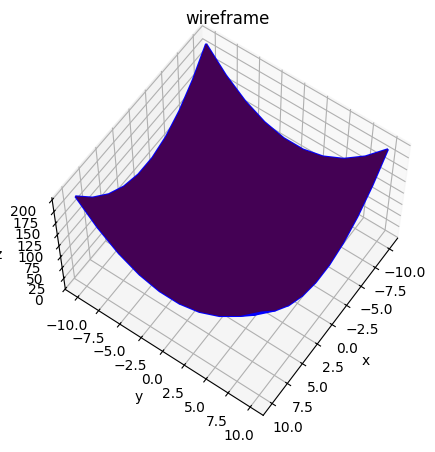

<Figure size 500x500 with 0 Axes>

In [9]:
interact(uga, angle1=(0, 180.0, 0.00001), angle2=(0, 180.0, 0.00001))